<a href="https://colab.research.google.com/github/BalKrishna-Tiwari/Playstore-App-Analysis/blob/main/PlayStoreAppAnalysis_1_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
from datetime import date
from datetime import timedelta

In [ ]:
df1=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capston Project/Play store app/Play Store Data.csv')
df2=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capston Project/Play store app/User Reviews.csv')


In [ ]:
# Defining a function may help
def extract_value(cell_value):
  ''' To convert string numbers into integer and to decode million value details '''
  try:
    if str(cell_value)[-1]=='M':
      return float(cell_value[:-1])*1000000
    elif str(cell_value)[-1]=='k':
      return float(cell_value[:-1])*1000
    else:     
      return float(cell_value)

  except: return cell_value  

In [ ]:
df1['Reviews']=df1['Reviews'].apply(lambda x: extract_value(x))

In [ ]:
df1['Size']=df1['Size'].apply(lambda x: extract_value(x))

In [ ]:
#Lets chek were size is not float

df1[~df1['Size'].apply(lambda x: isinstance(x, float))==True].head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639.0,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221.0,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057.0,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device


In [ ]:
# df1[df1['Size']=='1,000+']. Need to drop this column as data is icorrect here
df1.drop(10472, axis=0, inplace=True)

In [ ]:
df1.drop([9148], axis=0, inplace=True)

In [ ]:
Instalation_dict={'10,000+':10000,
 '500,000+':500000,
 '5,000,000+':5000000,
 '50,000,000+':50000000,
 '100,000+':100000,
 '50,000+':50000,
 '1,000,000+':1000000,
 '10,000,000+':10000000,
 '5,000+':5000,
 '100,000,000+':100000000,
 '1,000,000,000+':1000000000,
 '1,000+':1000,
 '500,000,000+':500000000,
 '50+':50,
 '100+':100,
 '500+':500,
 '10+':10,
 '1+':1,
 '5+':5,
 '0+':0}

In [ ]:
''' Implementing values as per dictionary in new data frame. Ans since no null value available in this colum
we can relie on dictionary directly '''

df1['Installs']=df1['Installs'].apply(lambda x: Instalation_dict[x])

In [ ]:
def extract_price(price):
  """ Give price prefixed as doller sign and the function will convert it into flat value """
  if len(price)==1:
    try: return float(price)
    except: return 0

  elif len(price)>1 and price[0]=='$':
    try: return float(price[1:])
    except: 0  

In [ ]:
# Implimenting extract price function on price column of dataframe
df1['Price']=df1['Price'].apply(lambda x: extract_price(x))

In [ ]:
def extract_lowest_android_2dig_version(version_range):
  """ This function will deal with given version and range and extract info about lowest version required to run the app"""
  try:
    x=version_range.split('.')
    if version_range==np.nan:
      return 'No data available'
    elif version_range=='Varies with device':
      return 'Varies with device'
    else:
      return float(x[0])
    
  except:
   return 'Undecodable'

In [ ]:
# Implimenting extract version function on android version column of dataframe
df1['Android Ver2']=df1['Android Ver'].apply(lambda x: extract_lowest_android_2dig_version(x))

In [ ]:
def extract_app_version(version_range):
  """ This function will deal with given version and range and extract info about lowest version required to run the app"""
  try:
    x=version_range.split('.')
    if version_range==np.nan:
      return 'No data available'
    else:
      return float(x[0])
    
  except:
   return 'Undecodable'

In [ ]:
# Implimenting extract version function on android version column of dataframe
df1['App Ver2']=df1['Android Ver'].apply(lambda x: extract_app_version(x))

In [ ]:
""" As all the values given in last updated column is string and none is null value. 
We can recall strip time method to decode string into time. """
df1['Last Updated']=df1['Last Updated'].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10839 non-null  object        
 1   Category        10839 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10839 non-null  float64       
 4   Size            10839 non-null  object        
 5   Installs        10839 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10839 non-null  float64       
 8   Content Rating  10839 non-null  object        
 9   Genres          10839 non-null  object        
 10  Last Updated    10839 non-null  datetime64[ns]
 11  Current Ver     10831 non-null  object        
 12  Android Ver     10837 non-null  object        
 13  Android Ver2    10839 non-null  object        
 14  App Ver2        10839 non-null  object        
dtypes:

In [ ]:
len(list(df1['App'].unique()))

9658

In [ ]:
df1.info()
""" We can note that certain app names are repeated in list. We have total 10840Rows out of which there are only 9658 names unique.
This implies 1181Rows are repeated. We need to verify thease repeated values by grouping them into set. """

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10839 non-null  object        
 1   Category        10839 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10839 non-null  float64       
 4   Size            10839 non-null  object        
 5   Installs        10839 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10839 non-null  float64       
 8   Content Rating  10839 non-null  object        
 9   Genres          10839 non-null  object        
 10  Last Updated    10839 non-null  datetime64[ns]
 11  Current Ver     10831 non-null  object        
 12  Android Ver     10837 non-null  object        
 13  Android Ver2    10839 non-null  object        
 14  App Ver2        10839 non-null  object        
dtypes:

' We can note that certain app names are repeated in list. We have total 10840Rows out of which there are only 9658 names unique.\nThis implies 1181Rows are repeated. We need to verify thease repeated values by grouping them into set. '

In [ ]:
df1[(df1['App'].duplicated()==True) & (df1['App']=='Quick PDF Scanner + OCR FREE')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android Ver2,App Ver2
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805.0,Varies with device,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,4.0,4.0
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804.0,Varies with device,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,4.0,4.0


In [ ]:
df1[(df1['App'].duplicated()==True)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181 entries, 229 to 10768
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             1181 non-null   object        
 1   Category        1181 non-null   object        
 2   Rating          1170 non-null   float64       
 3   Reviews         1181 non-null   float64       
 4   Size            1181 non-null   object        
 5   Installs        1181 non-null   int64         
 6   Type            1181 non-null   object        
 7   Price           1181 non-null   float64       
 8   Content Rating  1181 non-null   object        
 9   Genres          1181 non-null   object        
 10  Last Updated    1181 non-null   datetime64[ns]
 11  Current Ver     1181 non-null   object        
 12  Android Ver     1181 non-null   object        
 13  Android Ver2    1181 non-null   object        
 14  App Ver2        1181 non-null   object        
dtypes

In [ ]:
df1[(df1['App'].duplicated()==True) & (df1['Rating'].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android Ver2,App Ver2
666,Random Video Chat,DATING,NaN,3.0,16000000.0,1000,Free,0.00,Mature 17+,Dating,2018-07-15,4.20,4.0.3 and up,4.0,4.0
683,Random Video Chat App With Strangers,DATING,NaN,3.0,4800000.0,1000,Free,0.00,Mature 17+,Dating,2018-07-17,1.,4.0 and up,4.0,4.0
2111,Mcqueen Coloring pages,FAMILY,NaN,65.0,7000000.0,100000,Free,0.00,Everyone,Art & Design;Action & Adventure,2018-03-07,1.0.0,4.1 and up,4.0,4.0
2419,Advanced Comprehension Therapy,MEDICAL,NaN,3.0,62000000.0,100,Paid,24.99,Everyone,Medical,2017-10-05,1.2,4.0.3 and up,4.0,4.0
2498,Penn State Health OnDemand,MEDICAL,NaN,0.0,40000000.0,50,Free,0.00,Everyone,Medical,2018-07-24,10.4.1.018_06,4.0.3 and up,4.0,4.0
2502,Free Blood Pressure,MEDICAL,NaN,7.0,5700000.0,5000,Free,0.00,Everyone,Medical,2016-10-13,3.0.0,4.0.3 and up,4.0,4.0
2513,Blood Pressure,MEDICAL,NaN,10.0,2400000.0,1000,Free,0.00,Everyone,Medical,2015-03-14,1.0,2.3 and up,2.0,2.0
2516,RT 516 VET,MEDICAL,NaN,0.0,29000000.0,10,Free,0.00,Everyone,Medical,2018-07-13,300000.1.11,4.0.3 and up,4.0,4.0
2529,Breastfeeding Tracker Baby Log,MEDICAL,NaN,6.0,23000000.0,100,Free,0.00,Everyone,Medical,2018-07-20,1.3.5,5.0 and up,5.0,5.0
5147,Maricopa AH,MEDICAL,NaN,0.0,29000000.0,100,Free,0.00,Everyone,Medical,2018-07-16,300000.1.11,4.0.3 and up,4.0,4.0


In [ ]:
# Since there is no relation between duplicacy and nan values, its easy to remove duplicate value based on duplicacy in each row.
df1.drop_duplicates(inplace=True)

In [ ]:
df1[(df1['App'].duplicated()==True)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android Ver2,App Ver2
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804.0,Varies with device,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,4.0,4.0
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859.0,35000000.0,100000000,Free,0.0,Everyone,Business,2018-08-02,9.7.14188,4.1 and up,4.0,4.0
294,Slack,BUSINESS,4.4,51510.0,Varies with device,5000000,Free,0.0,Everyone,Business,2018-08-02,Varies with device,Varies with device,Varies with device,Undecodable
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Varies with device,Undecodable
383,imo free video calls and chat,COMMUNICATION,4.3,4785988.0,11000000.0,500000000,Free,0.0,Everyone,Communication,2018-06-08,9.8.000000010501,4.0 and up,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,Motorola FM Radio,VIDEO_PLAYERS,3.9,54815.0,Varies with device,100000000,Free,0.0,Everyone,Video Players & Editors,2018-05-02,Varies with device,Varies with device,Varies with device,Undecodable
10715,FarmersOnly Dating,DATING,3.0,1145.0,1400000.0,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,4.0,4.0
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981.0,4000000.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,5.0,5.0
10730,FP Notebook,MEDICAL,4.5,410.0,60000000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,4.0,4.0


In [ ]:
df1[(df1['App'].duplicated()==True) & (df1['App']=='PJ Masks: Moonlight Heroes')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android Ver2,App Ver2
9440,PJ Masks: Moonlight Heroes,FAMILY,4.4,87045.0,99000000.0,10000000,Free,0.0,Everyone,Casual;Action & Adventure,2018-06-05,2.0.1,4.0.3 and up,4.0,4.0


In [ ]:
dummy_series=df1.groupby(['App']).agg({'Category':'count'}).sort_values(by='Category',ascending=True)

In [ ]:
dummy_series[dummy_series['Category']>1]

,Category
App,
PJ Masks: Moonlight Heroes,2
"Meet24 - Love, Chat, Singles",2
"Chat Rooms, Avatars, Date - Galaxy",2
CW Seed,2
PicsArt Photo Studio: Collage Maker & Pic Editor,2
...,...
Zombie Catchers,6
Helix Jump,6
Bubble Shooter,6


In [ ]:
df1[(df1['App']=='ROBLOX')].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android Ver2,App Ver2
1653,ROBLOX,GAME,4.5,4447388.0,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,4.0,4.0
1701,ROBLOX,GAME,4.5,4447346.0,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,4.0,4.0
1748,ROBLOX,GAME,4.5,4448791.0,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,4.0,4.0
1841,ROBLOX,GAME,4.5,4449882.0,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,4.0,4.0
1870,ROBLOX,GAME,4.5,4449910.0,67000000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,4.0,4.0


In [ ]:
''' Thus actually the columns may be duplicated by name but there may be different value of rows.
Thus we have to except one of the duplicate or else should remove them all. 
We will again use drop duplicate based on column name only and keeping first occourence after
sorting Rating values that contain nan values too, so that nan value should be removed first'''
df1.sort_values('Rating', ascending=False, inplace=True)

In [ ]:
df1.drop_duplicates(subset='App', keep='first', inplace=True)

In [ ]:
# Shape 9658 is what we require to standerdise our data
df1.shape

(9658, 15)

In [ ]:
# There are multiple genres on app, we need to extract prime genres for each and consider it for analysis
df1['Prime_Genres']=df1['Genres'].apply(lambda x: x.split(';')[0])

In [ ]:
# Standerdising df1 and replacing missing value with average, median for analysis purpose
dff1=df1[['App', 'Category', 'Rating', 'Reviews', 'Content Rating','Type', 'Price', 'Installs', 'Size', 'App Ver2', 'Android Ver2']]

In [ ]:
dff1['Size'].replace('Varies with device', dff1[dff1['Size']!='Varies with device']['Size'].mean(), 
                     inplace=True) # 1226 of 9658 records was not available hence converted them to mean of all ie 20393889bytes
dff1['App Ver2'].replace('Undecodable', dff1[dff1['App Ver2']!='Undecodable']['App Ver2'].median(), 
                         inplace=True) # 992 of 9658 records was not available hence converted them to median of all ie 4.0 
dff1['Android Ver2'].replace(['Varies with device','Undecodable'], dff1[(dff1['Android Ver2']!='Varies with device') & (dff1['Android Ver2']!='Undecodable')]['Android Ver2'].median(),
                             inplace=True) # 992 of 9658 records was not available hence converted them to median of all ie 4.0

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

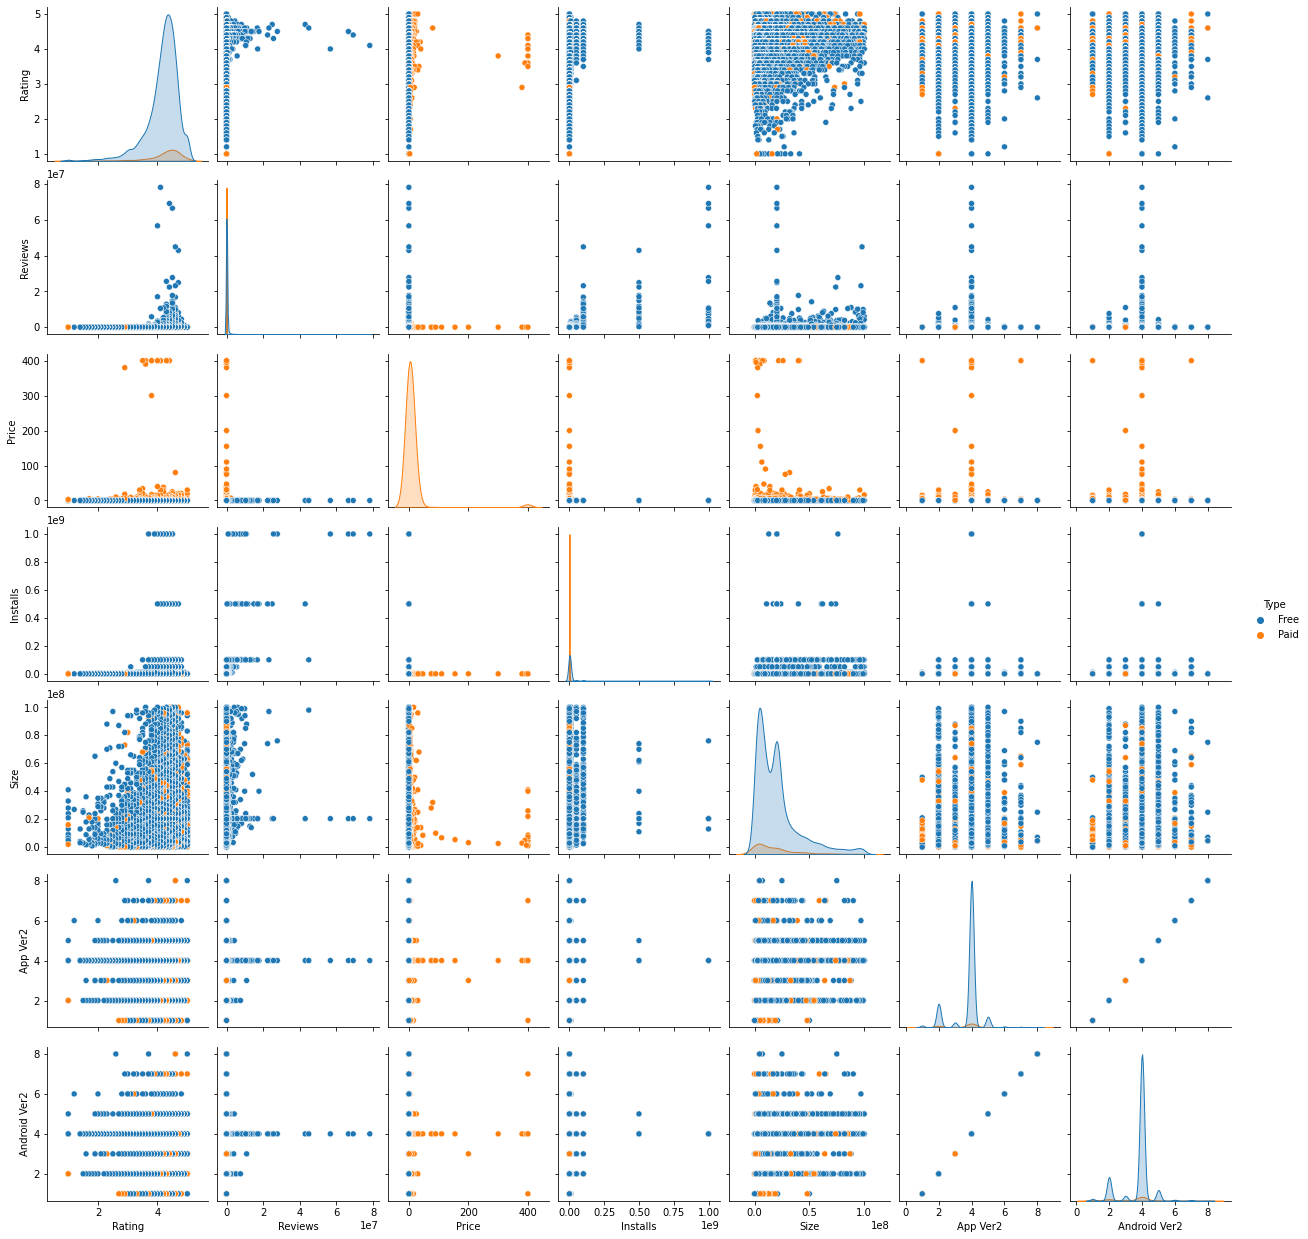

In [ ]:
# Categorical analysis
sns.pairplot(dff1, hue="Type")

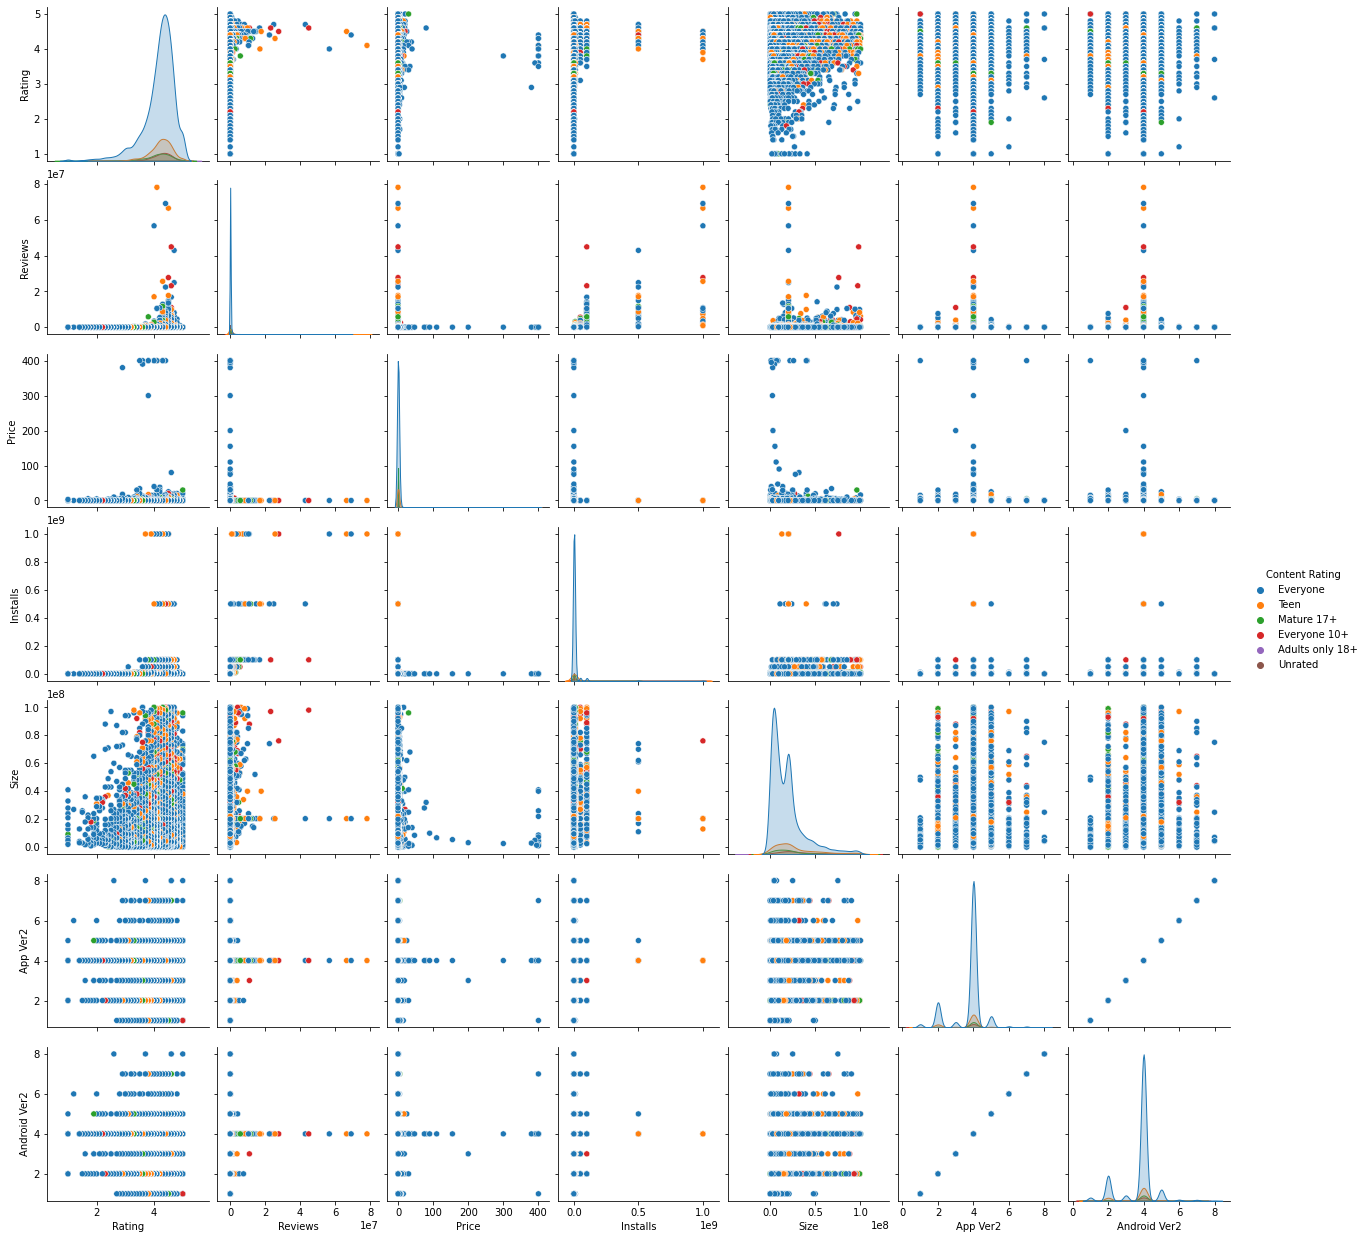

In [ ]:
# Categorical analysis
sns.pairplot(dff1, hue='Content Rating')

In [ ]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Android Ver2', 'App Ver2', 'Prime_Genres'],
      dtype='object')

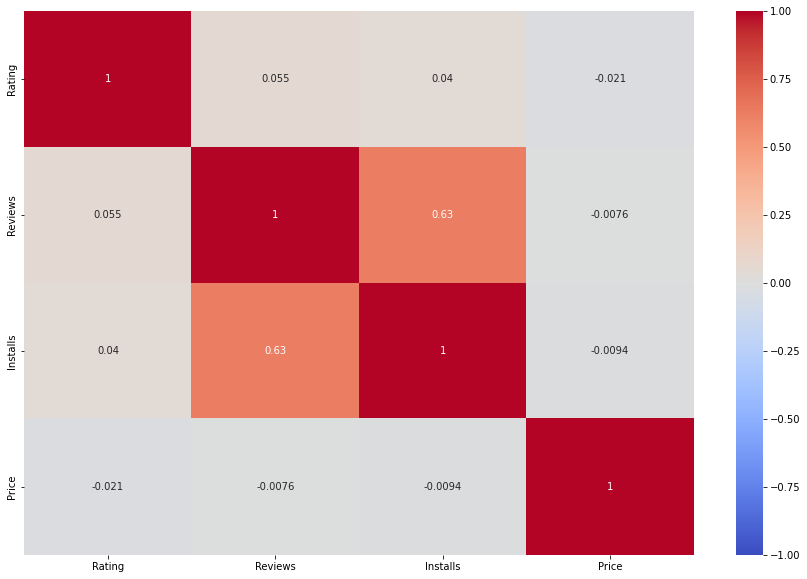

In [ ]:
# Correlation between various category
Corr=df1[['Rating', 'Reviews', 'Installs', 'Price', 'Last Updated', 'Size']]

corr_df = Corr.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_df,vmin=-1, cmap='coolwarm', annot=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


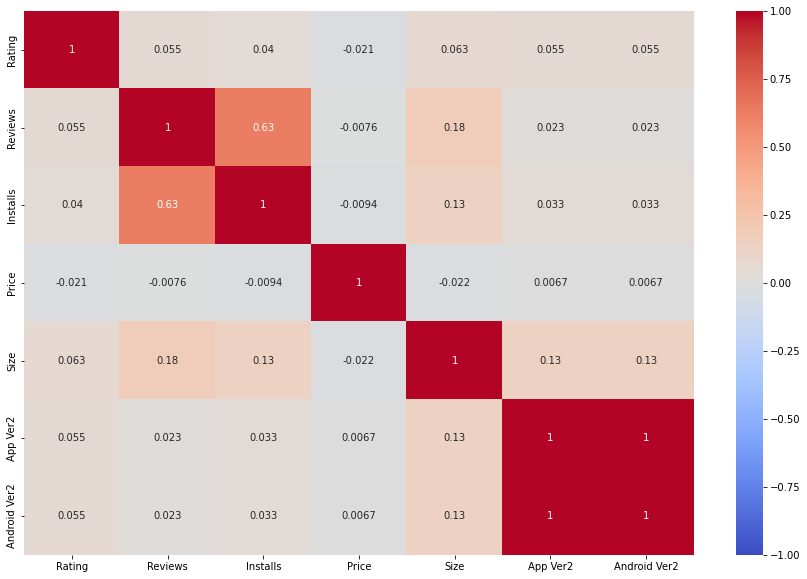

In [ ]:
# Standerdising df1 and replacing missing value with nun for analysis purpose
dff2=df1[['App', 'Category', 'Rating', 'Reviews', 'Content Rating','Type', 'Price', 'Installs', 'Size', 'App Ver2', 'Android Ver2', ]]

dff2['Size'].replace('Varies with device', np.nan, 
                     inplace=True) # 1226 of 9658 records was not available hence converted them to mean of all ie 20393889bytes
dff2['App Ver2'].replace('Undecodable', np.nan, 
                         inplace=True) # 992 of 9658 records was not available hence converted them to median of all ie 4.0 
dff2['Android Ver2'].replace(['Varies with device','Undecodable'], np.nan,
                             inplace=True) # 992 of 9658 records was not available hence converted them to median of all ie 4.0

# Correlation between various category
Corr=dff2[['Rating', 'Reviews', 'Installs', 'Price', 'Size', 'App Ver2', 'Android Ver2']]

corr_df = Corr.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_df,vmin=-1, cmap='coolwarm', annot=True)                             

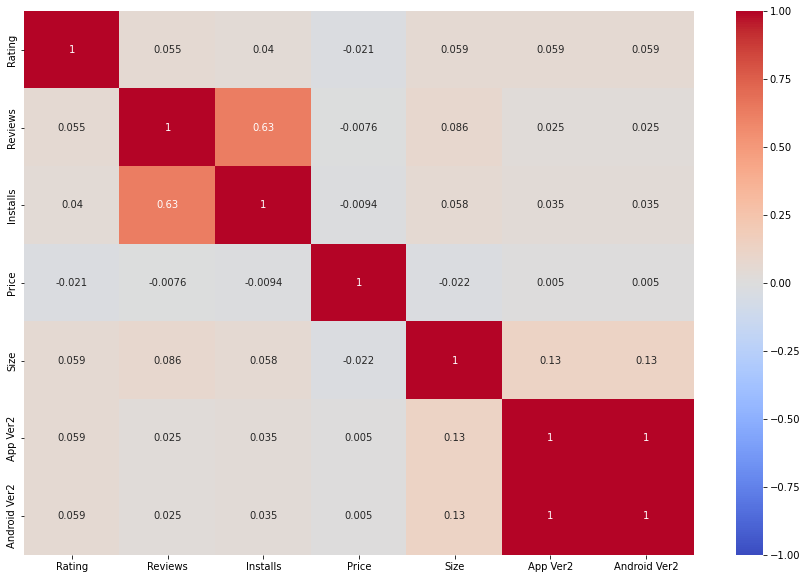

In [ ]:
# Correlation between various category
Corr=dff1[['Rating', 'Reviews', 'Installs', 'Price', 'Size', 'App Ver2', 'Android Ver2']]

corr_df = Corr.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_df,vmin=-1, cmap='coolwarm', annot=True)  

In [ ]:
''' As there is similar correlation seen in other case and nigligible difference is seen between actual data available vs assumption
made by us. We can apply thease mean and medians on actual data as well, ie on df1. '''
df1['Size'].replace('Varies with device', df1[df1['Size']!='Varies with device']['Size'].mean(), 
                     inplace=True) # 1226 of 9658 records was not available hence converted them to mean of all ie 20393889bytes
df1['App Ver2'].replace('Undecodable', df1[df1['App Ver2']!='Undecodable']['App Ver2'].median(), 
                         inplace=True) # 992 of 9658 records was not available hence converted them to median of all ie 4.0 
df1['Android Ver2'].replace(['Varies with device','Undecodable'], df1[(df1['Android Ver2']!='Varies with device') & (df1['Android Ver2']!='Undecodable')]['Android Ver2'].median(),
                             inplace=True) # 992 of 9658 records was not available hence converted them to median of all ie 4.0



In [ ]:
# We now need to merge review data into main data ie df1
df_review=pd.merge(df2, df1, how='left', left_on='App', right_on='App')


In [ ]:
# Calculating % of review available vs Actula rating done and summerising reviews skiiped in each case by category wise
def review_available(Review):
    if type(Review)==str:
      return 'NO'
    else: return 'YES'   

In [ ]:
df_review['Review_Available']=df_review['Translated_Review'].apply(lambda x: review_available(x))

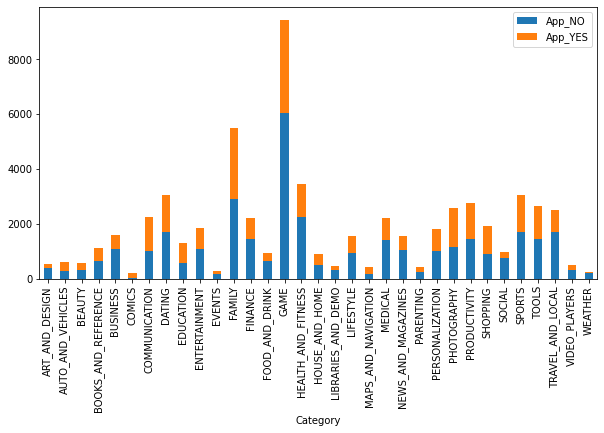

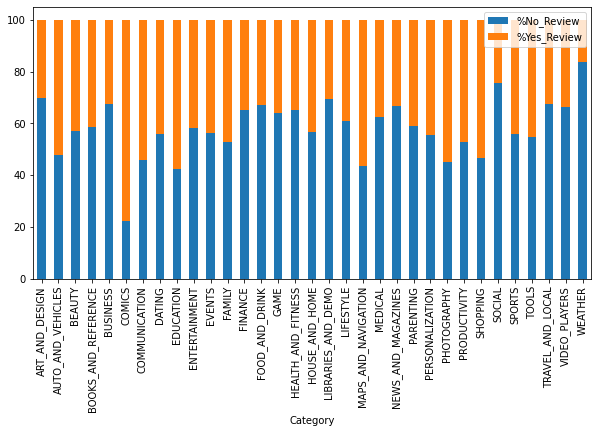

In [ ]:
# App Category Vs Review

df_review_distribution=df_review.groupby(['Category', 'Review_Available']).agg({'App':'count'})

df_review_distribution=df_review_distribution.unstack()
df_review_distribution.columns = ['_'.join(col) for col in df_review_distribution.columns.values]

df_review_distribution['%No_Review']=df_review_distribution['App_NO']/(df_review_distribution['App_NO']+df_review_distribution['App_YES'])*100
df_review_distribution['%Yes_Review']=df_review_distribution['App_YES']/(df_review_distribution['App_NO']+df_review_distribution['App_YES'])*100


df_review_distribution[['App_NO', 'App_YES']].plot(kind='bar', stacked=True, figsize=(10,5))

df_review_distribution[['%No_Review',	'%Yes_Review']].plot(kind='bar', stacked=True, figsize=(10,5))

In [ ]:
''' From above analysis we get to know that for most of cases Rating was given without any review.
Hence for hear after going deeper into kinds of review we will exclude all non reviewed ratings and dive for more understanding  '''

' From above analysis we get to know that for most of cases Rating was given without any review.\nHence for hear after going deeper into kinds of review we will exclude all non reviewed ratings and dive for more understanding  '

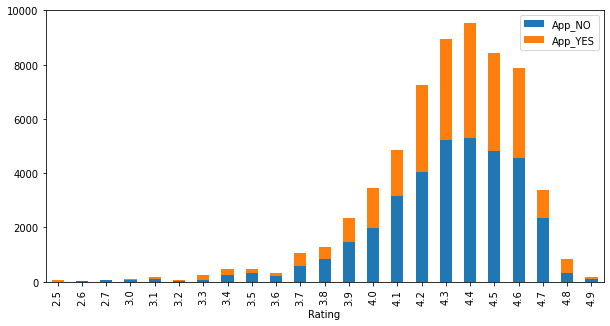

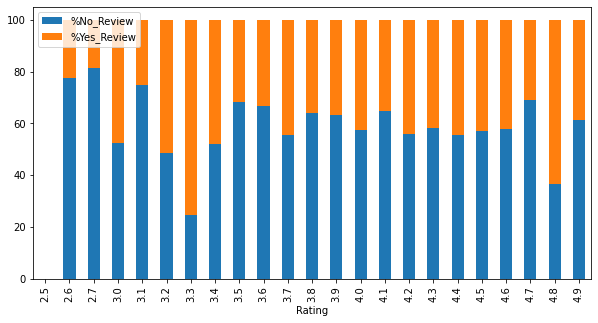

In [ ]:
# Rating vs review distribution

df_review_distribution2=df_review.groupby(['Rating', 'Review_Available']).agg({'App':'count'})

df_review_distribution2=df_review_distribution2.unstack()
df_review_distribution2.columns = ['_'.join(col) for col in df_review_distribution2.columns.values]

df_review_distribution2['%No_Review']=df_review_distribution2['App_NO']/(df_review_distribution2['App_NO']+df_review_distribution2['App_YES'])*100
df_review_distribution2['%Yes_Review']=df_review_distribution2['App_YES']/(df_review_distribution2['App_NO']+df_review_distribution2['App_YES'])*100

df_review_distribution2[['App_NO', 'App_YES']].plot(kind='bar', stacked=True, figsize=(10,5))

df_review_distribution2[['%No_Review',	'%Yes_Review']].plot(kind='bar', stacked=True, figsize=(10,5))

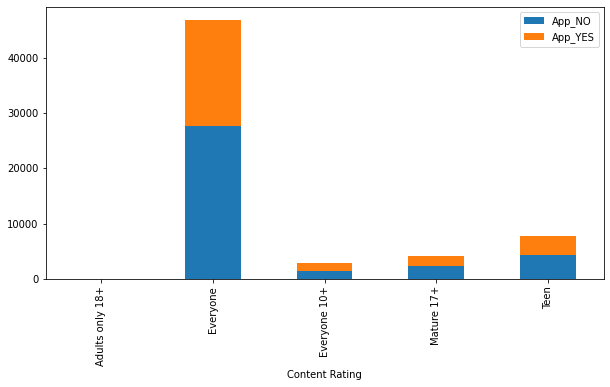

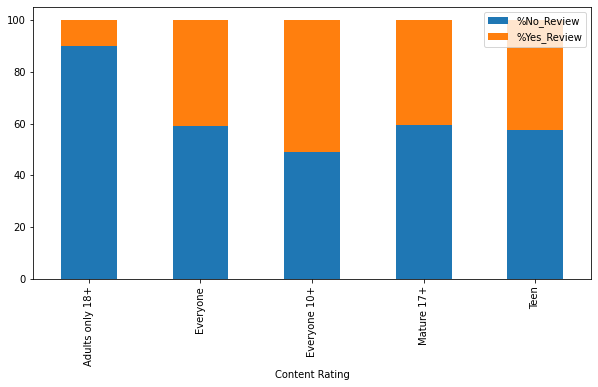

In [ ]:
# Contant Rating vs review distribution

df_review_distribution3=df_review.groupby(['Content Rating', 'Review_Available']).agg({'App':'count'})

df_review_distribution3=df_review_distribution3.unstack()
df_review_distribution3.columns = ['_'.join(col) for col in df_review_distribution3.columns.values]

df_review_distribution3['%No_Review']=df_review_distribution3['App_NO']/(df_review_distribution3['App_NO']+df_review_distribution3['App_YES'])*100
df_review_distribution3['%Yes_Review']=df_review_distribution3['App_YES']/(df_review_distribution3['App_NO']+df_review_distribution3['App_YES'])*100

df_review_distribution3[['App_NO', 'App_YES']].plot(kind='bar', stacked=True, figsize=(10,5))

df_review_distribution3[['%No_Review',	'%Yes_Review']].plot(kind='bar', stacked=True, figsize=(10,5))

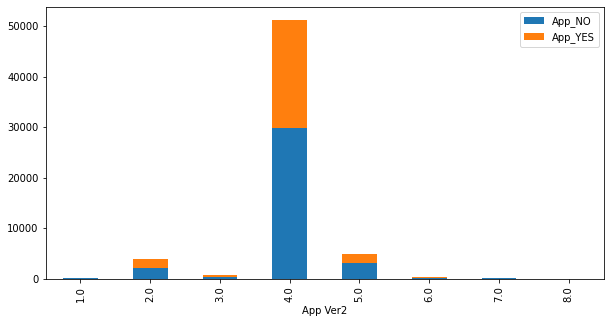

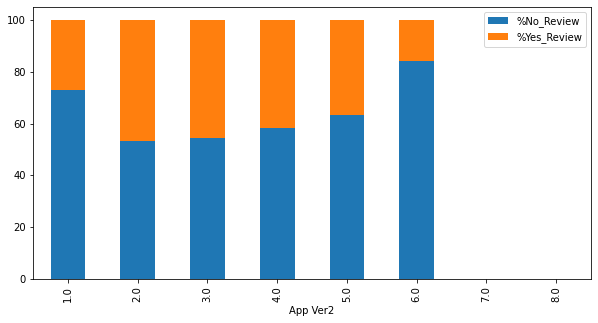

In [ ]:
# Current Version vs review distribution

df_review_distribution4=df_review.groupby(['App Ver2', 'Review_Available']).agg({'App':'count'})

df_review_distribution4=df_review_distribution4.unstack()
df_review_distribution4.columns = ['_'.join(col) for col in df_review_distribution4.columns.values]

df_review_distribution4['%No_Review']=df_review_distribution4['App_NO']/(df_review_distribution4['App_NO']+df_review_distribution4['App_YES'])*100
df_review_distribution4['%Yes_Review']=df_review_distribution4['App_YES']/(df_review_distribution4['App_NO']+df_review_distribution4['App_YES'])*100

df_review_distribution4[['App_NO', 'App_YES']].plot(kind='bar', stacked=True, figsize=(10,5))

df_review_distribution4[['%No_Review',	'%Yes_Review']].plot(kind='bar', stacked=True, figsize=(10,5))

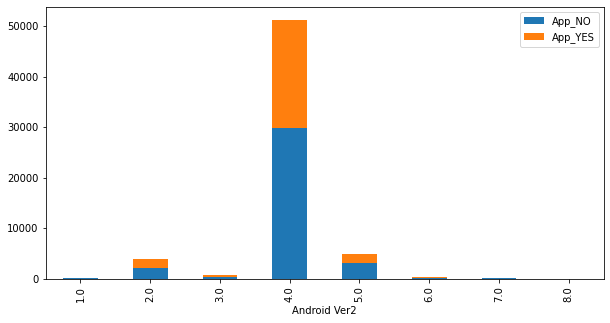

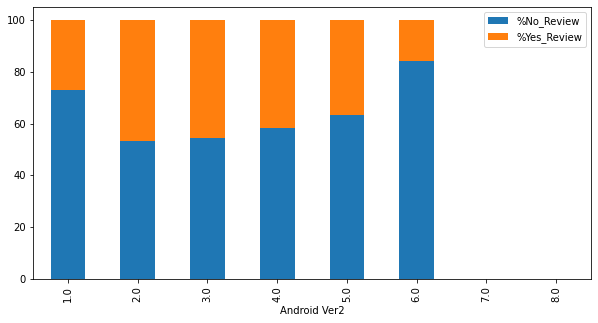

In [ ]:
# Android Version vs review distribution

df_review_distribution5=df_review.groupby(['Android Ver2', 'Review_Available']).agg({'App':'count'})

df_review_distribution5=df_review_distribution5.unstack()
df_review_distribution5.columns = ['_'.join(col) for col in df_review_distribution5.columns.values]

df_review_distribution5['%No_Review']=df_review_distribution5['App_NO']/(df_review_distribution5['App_NO']+df_review_distribution5['App_YES'])*100
df_review_distribution5['%Yes_Review']=df_review_distribution5['App_YES']/(df_review_distribution5['App_NO']+df_review_distribution5['App_YES'])*100

df_review_distribution5[['App_NO', 'App_YES']].plot(kind='bar', stacked=True, figsize=(10,5))

df_review_distribution5[['%No_Review',	'%Yes_Review']].plot(kind='bar', stacked=True, figsize=(10,5))

In [ ]:
''' From above analysis we notice that most of app and reviews corresponding to them belongs to
category 'Everyone' and App and Android version corresponding to 4.0. Assuming that for all other
category there may be biased situations like an App made for teen would shurely have recieved
negative experiance from non targeted audiance. Hence in order to get towerds generalised conclusion
that may appear valid to most cases, lets analyse those cases which has been prepared for larger
audiance and have greater number of reviews and ratings. '''

In [ ]:
''' From info we get that there are 64294 Ratings where people have given in total 37427Reviews.
This implies in most cases people have not written reviws but given rating only ''' 

' From info we get that there are 64294 Ratings where people have given in total 37427Reviews.\nThis implies in most cases people have not written reviws but given rating only '

In [ ]:
# Let us first add additional info like length of review for better understanding
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 5139 to 10838
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9658 non-null   object        
 1   Category        9658 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9658 non-null   float64       
 4   Size            9658 non-null   float64       
 5   Installs        9658 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9658 non-null   float64       
 8   Content Rating  9658 non-null   object        
 9   Genres          9658 non-null   object        
 10  Last Updated    9658 non-null   datetime64[ns]
 11  Current Ver     9650 non-null   object        
 12  Android Ver     9656 non-null   object        
 13  Android Ver2    9658 non-null   float64       
 14  App Ver2        9658 non-null   float64       
 15  

In [ ]:
# There are multiple genres on app, we need to extract prime genres for each and consider it for analysis
df1['Prime_Genres']=df1['Genres'].apply(lambda x: x.split(';')[0])

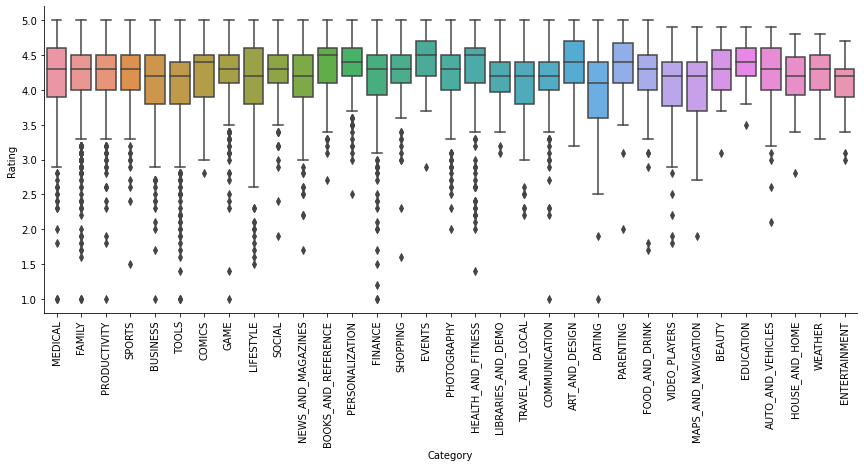

In [ ]:
# Let us first chek on category for rating beein given to them
ax=sns.catplot(data=df1, x="Category", y="Rating", kind="box", height=5, aspect=2.5)  #For controlling higher level API figsize will not work.
ax.set_xticklabels(rotation=90)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(4.7, 1.0, 'Median')

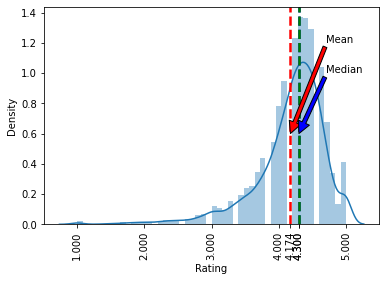

In [ ]:
# Cheking if rating is normally distributed

Rating=df1[~df1['Rating'].isna()]['Rating']
ax=sns.distplot(Rating, hist=True)
plt.axvline(x=Rating.median(),
            color='blue',
            ls='--', 
            lw=2.5)
plt.axvline(x=Rating.mean(),
            color='red',
            ls='--', 
            lw=2.5)
plt.axvline(x=float(Rating.mode()),
            color='green',
            ls='--', 
            lw=2.5)
plt.xticks([1,2,3,4,5,Rating.mean(),float(Rating.mode()),Rating.median()], rotation=90)

ax.annotate('Mean', xy=(Rating.mean(),0.6), xytext=(4.7,1.2), 
                  arrowprops=dict(facecolor='red', shrink=1))

ax.annotate('Median', xy=(Rating.median(),0.6), xytext=(4.7,1.0), 
                  arrowprops=dict(facecolor='blue', shrink=1))
